## Data Visualisation and Exploration of the Iceland Stake Measurements Dataset

In [24]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import rcParams
from matplotlib import gridspec

rcParams['axes.titlepad'] = 20 

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

PLOTTING = True

In [25]:
# Load the datasets of Iceland and Norway containing the stake measurements, topographical and climatological features. 
file_dir = '.././data/'

df_iceland = pd.read_csv(file_dir + 'files/Iceland_Stake_Data_Cleaned.csv')
df_norway = pd.read_csv(file_dir + 'files/Norway_Stake_Data.csv', index_col=False)

# Change the column names for the mass balance similar between the two datasets for convenience during plotting
df_norway['elevation'] = df_norway['altitude'].astype(int)
df_norway['bw_stratigraphic'] = df_norway['balance_winter']
df_norway['bs_stratigraphic'] = df_norway['balance_summer']
df_norway['ba_stratigraphic'] = df_norway['balance_netto']

### Basic Statistics of the Datasets of Iceland and Norway

In [26]:
df_iceland.describe()

,yr,lat,lon,elevation,bw_stratigraphic,bs_stratigraphic,ba_stratigraphic,topo,aspect,slope,...,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,altitude_climate
count,2844.000000,2844.000000,2844.000000,2844.000000,2832.000000,2796.000000,2795.000000,2844.000000,2844.000000,2844.000000,...,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000
mean,2008.060478,64.626204,-18.145135,1222.477115,1.694419,-2.351995,-0.651914,990.669157,3.284980,0.043976,...,0.005863,0.006183,0.005157,0.003776,0.002735,0.002502,0.002833,0.003091,0.005071,0.257013
std,8.829004,0.202188,1.451213,328.326564,0.942143,1.861286,2.636163,513.325066,1.237032,0.060392,...,0.002625,0.003015,0.002635,0.001942,0.001424,0.001105,0.001046,0.001264,0.002266,0.338591
min,1986.000000,63.998167,-20.570500,88.980000,-4.572000,-10.750000,-13.600000,74.056297,0.612189,0.004765,...,0.000644,0.000438,0.000849,0.001148,0.000558,0.000156,0.000621,0.000421,0.000876,-0.673290
25%,2001.000000,64.494914,-18.951361,993.000000,1.090000,-3.531000,-2.340000,523.150269,2.533311,0.011002,...,0.004005,0.004193,0.003176,0.002415,0.001725,0.001661,0.002161,0.002365,0.003463,0.146155
50%,2009.000000,64.637770,-18.499960,1246.000000,1.722000,-1.880000,-0.021000,1025.718994,3.422019,0.014667,...,0.005423,0.005652,0.004616,0.003318,0.002345,0.002394,0.002639,0.002881,0.004812,0.146155
75%,2016.000000,64.790063,-16.987595,1447.075000,2.323500,-0.956750,1.320000,1293.748413,4.127100,0.055367,...,0.007426,0.007807,0.006612,0.004573,0.003460,0.003121,0.003434,0.003628,0.006175,0.555877
max,2022.000000,64.973930,-15.556667,1971.100000,6.315000,1.190000,6.910000,1955.675415,5.530638,0.312709,...,0.016787,0.023658,0.015893,0.014619,0.010389,0.008290,0.008493,0.012119,0.020497,0.760739


In [27]:
df_norway.describe()

,BREID,utm_zone,utm_east_approx,utm_north_approx,altitude_approx,altitude,utm_east,utm_north,balance_winter,balance_summer,...,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,altitude_climate,elevation,bw_stratigraphic,bs_stratigraphic,ba_stratigraphic
count,4171.000000,4171.000000,4046.000000,4.046000e+03,4171.000000,4171.000000,4171.000000,4.171000e+03,3752.000000,3929.000000,...,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,3752.000000,3929.000000,3910.000000
mean,2016.389595,32.306641,416594.683144,6.998373e+06,1305.782546,1304.213306,416192.096380,6.993659e+06,2.261328,-3.036948,...,0.003414,0.004383,0.005068,0.005136,0.006859,1027.630850,1304.212899,2.261328,-3.036948,-0.648239
std,830.585513,0.551607,84910.220492,3.328960e+05,356.993270,366.898487,83638.081365,3.290153e+05,1.147563,1.979427,...,0.001788,0.001951,0.002058,0.002121,0.003595,338.418881,366.898539,1.147563,1.979427,2.329220
min,54.000000,32.000000,322000.000000,6.647150e+06,300.000000,190.000000,321760.000000,6.646952e+06,-2.990000,-13.330000,...,0.000774,0.000646,0.000731,0.000960,0.000691,306.822623,190.000000,-2.990000,-13.330000,-13.100000
25%,1280.000000,32.000000,352670.000000,6.839000e+06,1070.000000,1066.500000,352895.000000,6.839616e+06,1.470000,-3.860000,...,0.002083,0.002955,0.003674,0.003660,0.004149,672.073602,1066.500000,1.470000,-3.860000,-1.510000
50%,2297.000000,32.000000,401450.000000,6.850000e+06,1308.000000,1310.000000,401670.000000,6.849938e+06,2.190000,-2.610000,...,0.003067,0.004017,0.004859,0.004887,0.006047,1001.181943,1310.000000,2.190000,-2.610000,-0.250000
75%,2474.000000,33.000000,449915.000000,7.372100e+06,1585.000000,1593.000000,449400.000000,7.371420e+06,3.000000,-1.720000,...,0.004337,0.005433,0.006549,0.006410,0.009150,1346.780081,1593.000000,3.000000,-1.720000,0.780000
max,3141.000000,34.000000,624750.000000,7.781670e+06,2212.000000,2212.000000,624784.000000,7.781790e+06,9.990000,1.420000,...,0.010110,0.011823,0.012761,0.011971,0.022726,1674.564182,2212.000000,9.990000,1.420000,5.720000


### Overview of Annual Glacier Measurements in Iceland

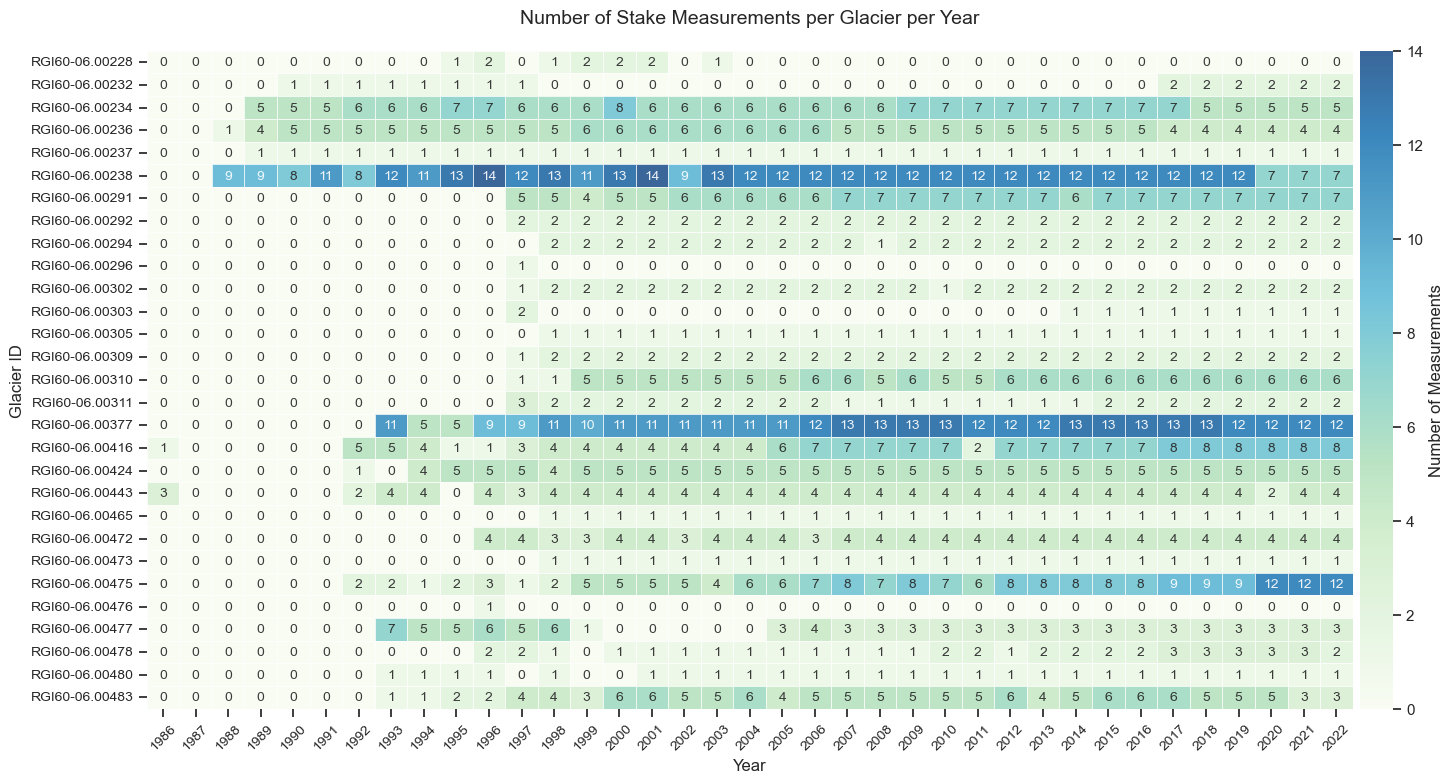

In [28]:
# Define the range of years and unique glacier IDs
measurement_years = np.arange(df_iceland['yr'].min(), df_iceland['yr'].max() + 1)
glacier_ids = df_iceland.dropna(subset=['RGIId'])['RGIId'].unique()

# Create DataFrame to store number of measurements per year per glacier
num_measurements = pd.DataFrame(index=glacier_ids, columns=measurement_years).fillna(0)

# Calculate the number of measurements for each glacier and year
for idx in num_measurements.index:
    temp = df_iceland.loc[df_iceland['RGIId'] == idx].groupby('yr')['stake'].count()
    num_measurements.loc[idx, temp.index] = temp

# Plotting
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(
    data=num_measurements, 
    cmap='GnBu', 
    alpha=0.8, 
    cbar_kws={'label': 'Number of Measurements', 'pad': 0.005}, 
    annot=True, 
    annot_kws={'alpha': 0.9, 'fontsize': 10}, 
    linewidths=.5
)

# Customize plot appearance
plt.xlabel('Year', fontsize=12)
plt.ylabel('Glacier ID', fontsize=12)
plt.title('Number of Stake Measurements per Glacier per Year', fontsize=14)
plt.xticks(np.arange(len(measurement_years)) + 0.5, measurement_years, rotation=45, fontsize=10)
plt.yticks(np.arange(len(glacier_ids)) + 0.5, glacier_ids, rotation=0, fontsize=10)
plt.grid(False)
plt.tight_layout()

# Save the plot if PLOTTING is defined and True
if 'PLOTTING' in globals() and PLOTTING:
    plt.savefig(file_dir + 'plots/num_measurements_per_year_per_glacier.svg', dpi=600, format='svg')

plt.show()
plt.close()

### Stacked Bar Chart of Annual, Winter, and Summer Surface Mass Balance Measurements per Year

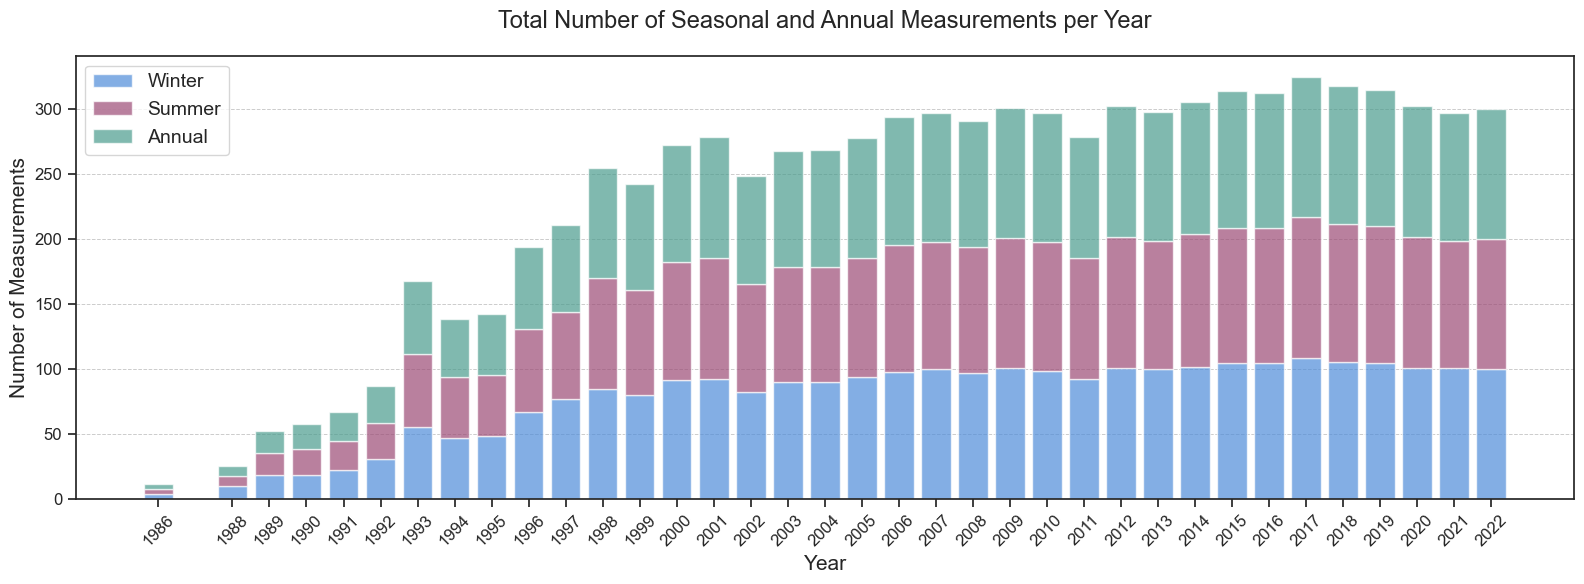

In [29]:
# Group measurements by year for each type
bw_num_measurements = df_iceland.groupby('yr')['bw_stratigraphic'].count()
bs_num_measurements = df_iceland.groupby('yr')['bs_stratigraphic'].count()
ba_num_measurements = df_iceland.groupby('yr')['ba_stratigraphic'].count()

# Plotting
plt.figure(figsize=(16, 6))

# Plot Winter measurements
plt.bar(
    bw_num_measurements.index, 
    bw_num_measurements.values, 
    label='Winter', 
    color='#4e8cd9', 
    alpha=0.7
)

# Plot Summer measurements on top of Winter measurements
plt.bar(
    bs_num_measurements.index, 
    bs_num_measurements.values, 
    bottom=bw_num_measurements.values, 
    label='Summer', 
    color='#9c4b75', 
    alpha=0.7
)

# Plot Annual measurements on top of Winter and Summer measurements
plt.bar(
    ba_num_measurements.index, 
    ba_num_measurements.values, 
    bottom=bw_num_measurements.values + bs_num_measurements.values, 
    label='Annual', 
    color='#4b9c8d', 
    alpha=0.7
)

# Adding labels and title
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Measurements', fontsize=15)
plt.title('Total Number of Seasonal and Annual Measurements per Year', fontsize=17)

# Setting tick parameters
plt.xticks(ticks=bs_num_measurements.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Centering x-axis labels
ax = plt.gca()
plt.setp(ax.xaxis.get_majorticklabels(), ha='center')

# Adding legend
plt.legend(fontsize=14)

# Adjusting layout and grid
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
plt.gca().xaxis.grid(False)

# Save the plot if PLOTTING is defined and True
if 'PLOTTING' in globals() and PLOTTING:
    plt.savefig(file_dir + '/plots/num_measurements_per_year.svg', dpi=600, format='svg')

plt.show()
plt.close()

### Create a 2D Histogram of the Three Key Topographical Features of Icelandic Glaciers Versus Annual Mass Balance

In [30]:
def create_joint_grid(df, y_var, title, y_label, log=False):
    """
    Create a joint grid plot showing the relationship between annual mass balance and a given variable.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        y_var (str): The name of the variable to be plotted against annual mass balance.
        title (str): The title of the plot.
        y_label (str): The label for the y-axis.
        log (bool, optional): Whether to use a logarithmic scale on the y-axis. Defaults to False.
    """
    sns.set_theme(style="ticks")
    
    # Initialize the JointGrid
    g = sns.JointGrid(data=df, x='ba_stratigraphic', y=y_var, marginal_ticks=True)
    
    # Create an inset legend for the histogram colorbar
    cax = g.figure.add_axes([.15, .55, .02, .25])
    
    g.ax_joint.grid(True)
    
    if log:
        g.ax_joint.set(yscale="log")
    
    # Add the joint and marginal histogram plots
    g.plot_joint(
        sns.histplot, discrete=(True, False),
        cmap="light:#4e8cd9", pmax=.8, cbar=True, cbar_ax=cax
    )
    g.plot_marginals(sns.histplot, color="#4e8cd9", linewidth=.5)
    
    plt.suptitle(f"Annual Mass Balance by {title}", fontsize=14, y=1)
    
    g.set_axis_labels("Annual Mass Balance [m w.e.]", y_label)
    
    if 'PLOTTING' in globals() and PLOTTING:
        plt.savefig(file_dir + f'plots/{title}.svg', dpi=600, format='svg')
    plt.show()
    plt.close()

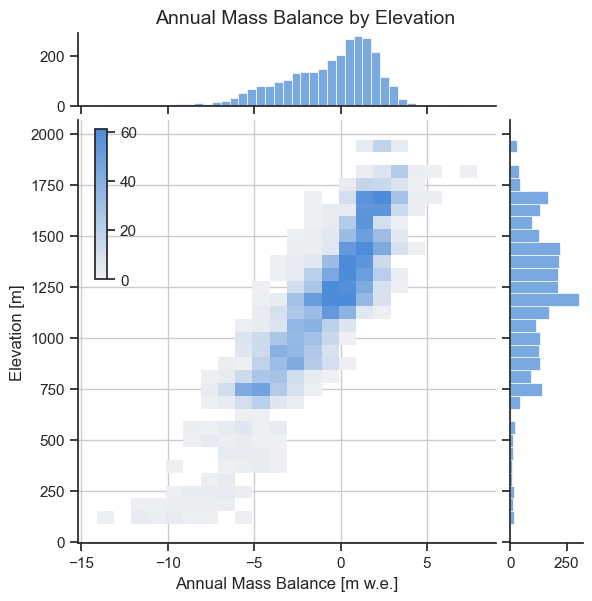

In [31]:
create_joint_grid(df_iceland, "elevation", "Elevation", "Elevation [m]")

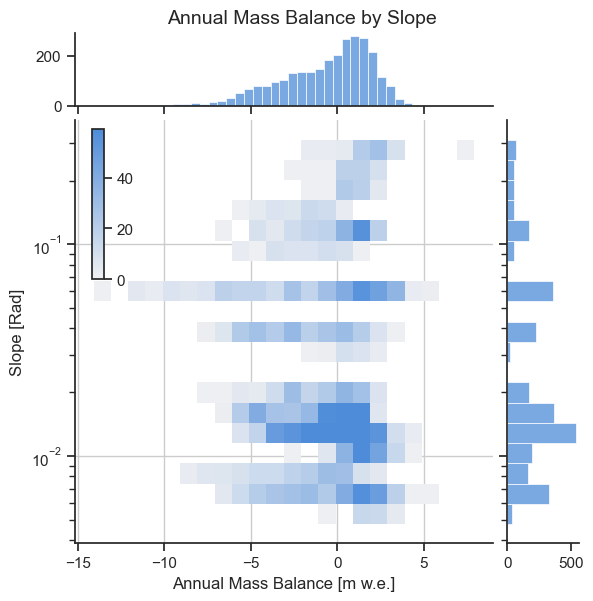

In [32]:
create_joint_grid(df_iceland, "slope", "Slope", "Slope [Rad]", True)

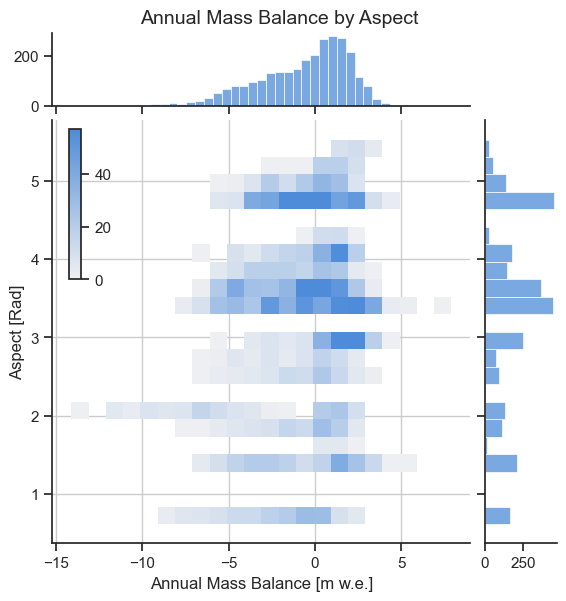

In [33]:
create_joint_grid(df_iceland, "aspect", "Aspect", "Aspect [Rad]", False)

### Create a Correlation Matrix for Topographical and Climatological Features with Mass Balances

In [34]:
# List of suffixes for summer and winter months
summer_suffixes = ['_apr', '_may', '_jun', '_jul', '_aug', '_sep']
winter_suffixes = ['_oct', '_nov', '_dec', '_jan', '_feb', '_mar']

def calculate_seasonal_average(df):
    """
    Filters the DataFrame columns based on specified suffixes and calculates averages for summer and winter chunks.

    Parameters:
        df (DataFrame): The DataFrame containing the data.

    Returns:
        tuple: A tuple containing two DataFrames:
               - summer_avg: DataFrame with summer averages and additional columns.
               - winter_avg: DataFrame with winter averages and additional columns.
    """
    # Selecting columns based on the suffixes
    summer_columns = [col for col in df.columns if col.endswith(tuple(summer_suffixes))]
    winter_columns = [col for col in df.columns if col.endswith(tuple(winter_suffixes))]
    
    # Creating separate DataFrames for summer and winter columns
    summer_cols = df[summer_columns]
    winter_cols = df[winter_columns]
    
    # Calculating averages for summer and winter columns
    summer_avg = calculate_average_for_season(summer_cols)
    winter_avg = calculate_average_for_season(winter_cols)
    
    # Adding additional columns to summer and winter DataFrames
    additional_columns = ['bw_stratigraphic', 'bs_stratigraphic', 'ba_stratigraphic']
    summer_avg[additional_columns] = df[additional_columns]
    winter_avg[additional_columns] = df[additional_columns]
    
    return summer_avg, winter_avg

def calculate_average_for_season(df, chunk_size=6):
    """
    Calculate the average for every chunk of columns, the average of each climate variable for each season, return this.

    Parameters:
        df (DataFrame): The DataFrame containing the climate variables.
        chunk_size (int): The size of each chunk of columns.

    Returns:
        DataFrame: A new DataFrame containing the average value for each season, of each climate variable.
    """
    # Reshape the DataFrame into chunks
    chunks = np.array_split(df.values, -(-len(df.columns) // chunk_size), axis=1)

    columns = [col_name[:-4] for col_name in df.columns.values]
    columns = np.flip(np.unique(columns))
    
    # Calculate averages for each chunk and concatenate them
    avg_chunks = [np.mean(chunk, axis=1) for chunk in chunks]
    avg_df = pd.DataFrame(np.column_stack(avg_chunks), columns=columns) 
    
    return avg_df

In [35]:
# List of columns to keep
topo_columns = ['dis_from_border', 'slope', 'aspect', 'elevation', 'lon', 'lat', 'topo', 'bw_stratigraphic','bs_stratigraphic', 'ba_stratigraphic']
topo_ticks_labels = ['Distance\nfrom Border', 'Slope', 'Aspect', 'Elevation', 'Longitude', 'Latitude', 'Topography']
mbs_tick_labels= ['Winter Mass Balance', 'Summer Mass Balance','Annual Mass Balance']

# Copy the DataFrame and keep only the specified columns for the topographical features
df_subset_iceland_topo = df_iceland[topo_columns].copy()
df_subset_norway_topo = df_norway[topo_columns].copy()

# Copy the DataFrame and keep only the specified columns for the climatological features
df_subset_iceland_climate = df_iceland.copy()
df_subset_norway_climate = df_norway.copy()

# Calculate the average seasonal value for the 22 climate variables, for both Iceland and Norway
summer_avg_IS, winter_avg_IS = calculate_seasonal_average(df_subset_iceland_climate)
summer_avg_NR, winter_avg_NR = calculate_seasonal_average(df_subset_norway_climate)

In [36]:
def plot_correlation_matrix(df1, df2, ticks_labels, suptitle, ax1_title, ax2_title, f_name, type_plot):
    if type_plot == 'topo':
        fig = plt.figure(figsize=(7, 10))
        gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 0.10], width_ratios=[1], hspace=.5)
    else:
        fig = plt.figure(figsize=(10, 7))
        gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 0.10], width_ratios=[1], hspace=0.1)

    # Create subplots within the gridspec
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    cax = fig.add_subplot(gs[2])

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(20, 230, as_cmap=True)

    variables_of_interest = ['bw_stratigraphic', 'bs_stratigraphic', 'ba_stratigraphic']
    correlation_subset_df1 = df1.corr().loc[variables_of_interest].iloc[:, :-3]
    correlation_subset_df2 = df2.corr().loc[variables_of_interest].iloc[:, :-3]

    sns.heatmap(correlation_subset_df1, ax=ax1, cmap=cmap, cbar=False, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, yticklabels=mbs_tick_labels, xticklabels=ticks_labels)
    sns.heatmap(correlation_subset_df2, ax=ax2, cmap=cmap, cbar=False, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, yticklabels=mbs_tick_labels, xticklabels=ticks_labels)

    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

    plt.setp(ax1.xaxis.get_majorticklabels(), ha='right')
    plt.setp(ax2.xaxis.get_majorticklabels(), ha='right')

    ax1.set_title(ax1_title, fontsize=14)
    ax2.set_title(ax2_title, fontsize=14)
    fig.suptitle(suptitle, fontsize=16, y=.97)

    # Add colorbar at the bottom of the plots
    cb = fig.colorbar(ax2.get_children()[0], cax=cax, orientation='horizontal', location='bottom')
    cb.outline.set_visible(False)
    cb.ax.set_xlabel('Pearson Correlation')
    cax.set_aspect('auto')

    if type_plot == 'topo':
        plt.tight_layout(h_pad=1.2)
    else:
        plt.tight_layout(h_pad=0)

    if 'PLOTTING' in globals() and PLOTTING:
        plt.savefig(f_name, dpi=600, format='svg', bbox_inches='tight')

    plt.show()
    plt.close(fig)

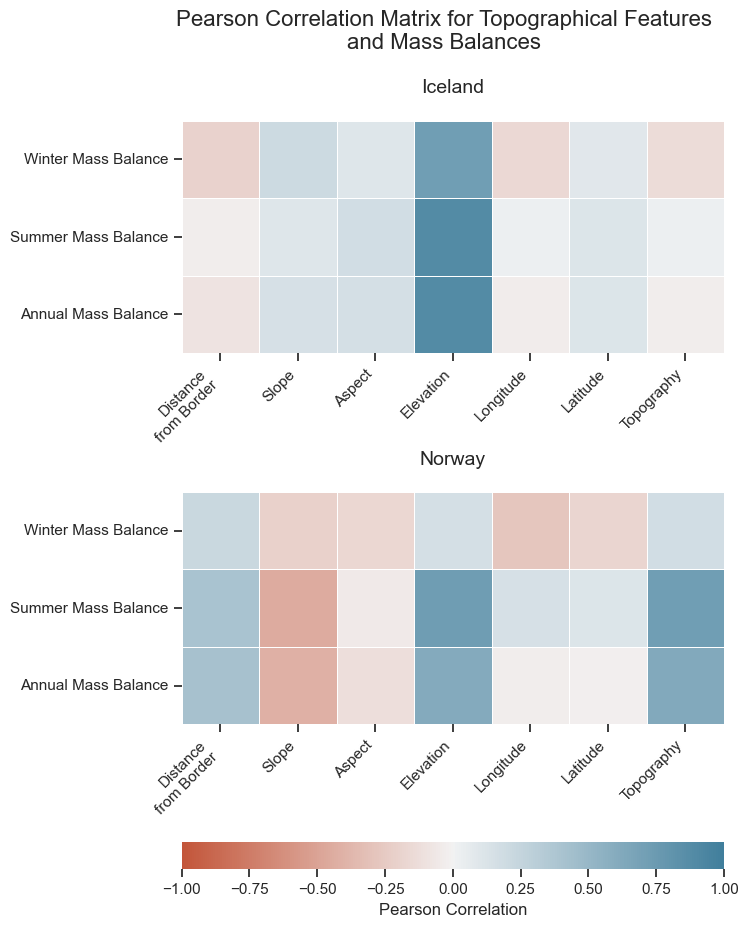

In [37]:
# Iceland - Topographical Features
plot_correlation_matrix(
    df_subset_iceland_topo,
    df_subset_norway_topo,
    topo_ticks_labels,
    'Pearson Correlation Matrix for Topographical Features\nand Mass Balances',
    'Iceland',
    'Norway',
    file_dir + '/plots/corr_topo.svg',
    'topo'
)

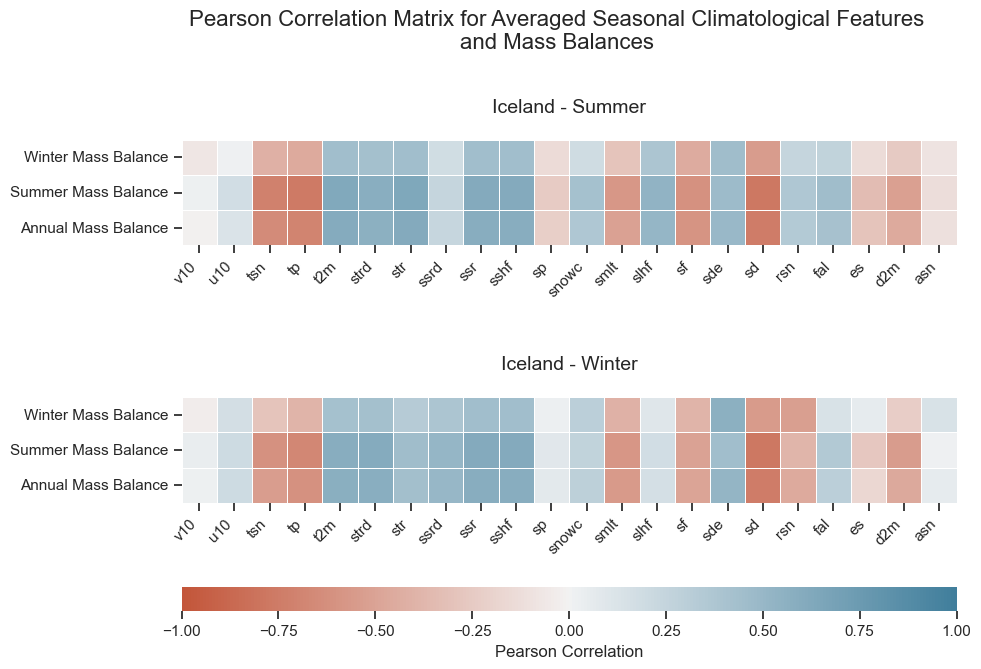

In [38]:
# Iceland - Climate - Averaged Seasonal
climate_ticks_labels = [i for i in summer_avg_IS.columns[:-3]]

plot_correlation_matrix(
    summer_avg_IS, 
    winter_avg_IS,
    climate_ticks_labels,
    'Pearson Correlation Matrix for Averaged Seasonal Climatological Features\nand Mass Balances',
    'Iceland - Summer',
    'Iceland - Winter',
    file_dir + 'plots/corr_climate_IS.svg',
    'climate'
)

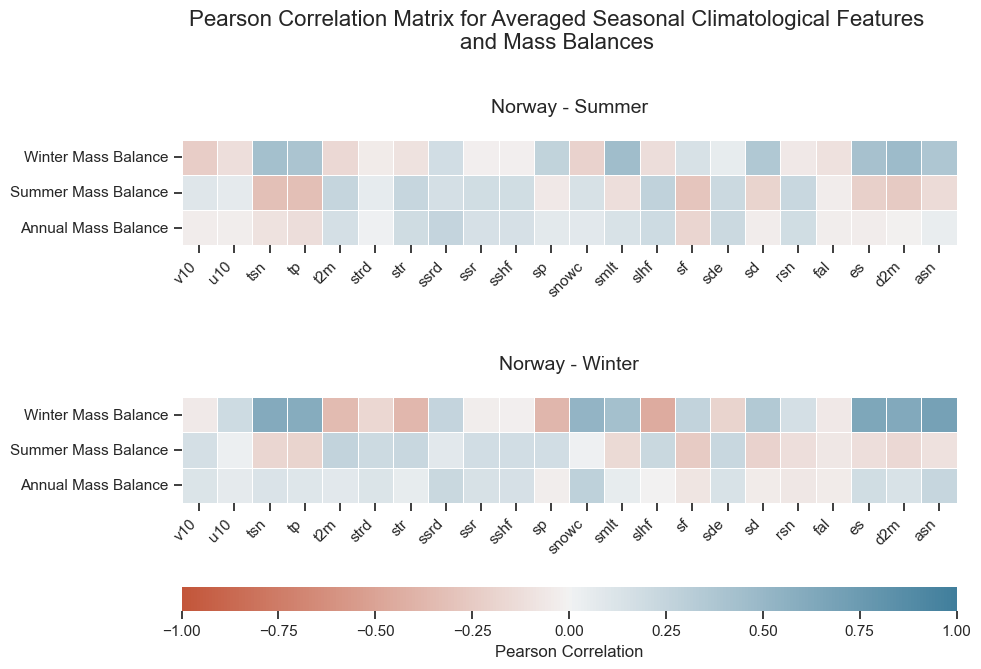

In [39]:
plot_correlation_matrix(
    summer_avg_NR, 
    winter_avg_NR,
    climate_ticks_labels,
    'Pearson Correlation Matrix for Averaged Seasonal Climatological Features\nand Mass Balances',
    'Norway - Summer',
    'Norway - Winter',
    file_dir + 'plots/corr_climate_NR.svg',
    'climate'
)

### Create Histograms of Seasonal and Annual Mass Balances along with Topographical Aspects for Glaciers in Iceland and Norway


In [40]:
def plot_dual_histograms(columns, axs_titles, x_labels, binwidths, titleplot, df1 = df_iceland, df2 = df_norway):
    """
    Plot dual histograms comparing two datasets across multiple columns.
    
    Parameters:
        df1 (DataFrame): The first dataset for comparison. Default is df_iceland.
        df2 (DataFrame): The second dataset for comparison. Default is df_norway.
        columns (list): List of column names to plot histograms for.
        axs_titles (list): Titles for each subplot.
        x_labels (list): Labels for the x-axis of each subplot.
        binwidths (list): Bin widths for histograms.
        titleplot (str): Title for the entire plot.
    
    Returns:
        None
    """
    
    # Define height ratios for subplots
    height_ratios = [1, 5]

    # Create subplots with defined height ratios
    fig, axs = plt.subplots(2, 3, figsize=(16, 6), gridspec_kw={'height_ratios': height_ratios})
    axs = axs.T  # Transpose axes for convenient iteration

    # Iterate over columns and corresponding subplot parameters
    for ax, data, xlabel, title, binwidth in zip(axs, columns, x_labels, axs_titles, binwidths):
        # Boxplot of concatenated data
        sns.boxplot(data=pd.concat([df1[data], df2[data]], axis=1, keys=['Iceland', 'Norway']), orient="h", ax=ax[0], palette=['#4e8cd9', '#4b9c8d'])

        # Histograms for each dataset
        sns.histplot(df1[data], ax=ax[1], binwidth=binwidth, color='#4e8cd9', alpha=0.5, label='Iceland')
        sns.histplot(df2[data], ax=ax[1], binwidth=binwidth, color='#4b9c8d', alpha=0.5, label='Norway')

        # Set xlabel, title, and tick parameters for histogram subplot
        ax[1].set_xlabel(xlabel, fontsize=14)
        ax[1].set_title(title, fontsize=17)
        ax[1].tick_params(axis='x', labelsize=12)

        # Disable y-axis labels for all but the first subplot
        if ax[1] != axs[0][1]:
            ax[1].set_ylabel(None)
        ax[1].tick_params(axis='y', labelsize=12)

    # Create legend handles and labels
    labels_handles = {label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())}

    # Place legend at the bottom horizontally
    plt.figlegend(
        labels_handles.values(),
        labels_handles.keys(),
        loc='lower center',
        ncol=2,
        labelspacing=0.,
        bbox_to_anchor=(0, -.05, 1, 1),
        bbox_transform=plt.gcf().transFigure
    )

    # Set main title and adjust layout
    plt.suptitle(titleplot, fontsize=17)
    plt.tight_layout()

    # Save or show the plot based on savefig parameter
    if 'PLOTTING' in globals() and PLOTTING:
        plt.savefig(file_dir + f'plots/{titleplot}.svg', dpi=600, format='svg', bbox_inches='tight')
        
    plt.show()
    plt.close(fig)

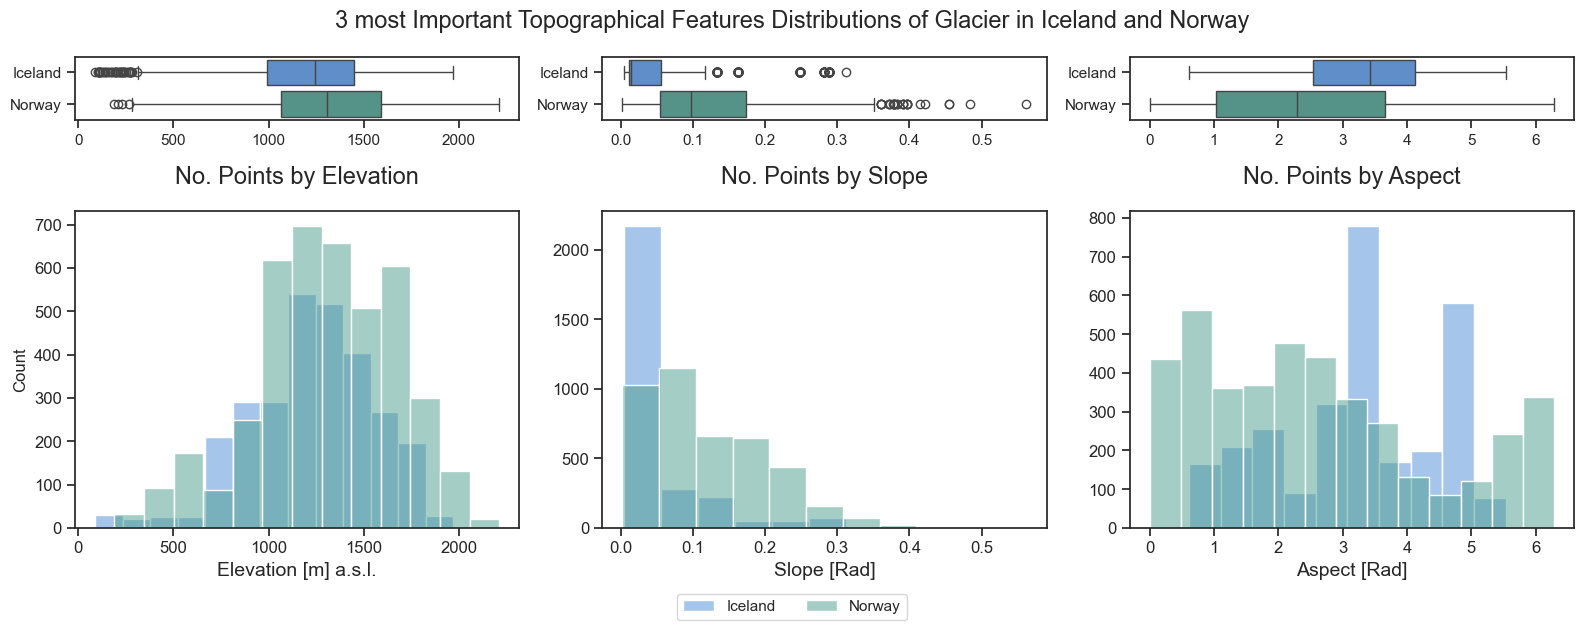

In [41]:
cols_topo = ['elevation', 'slope', 'aspect']
labels_topo = ['Elevation [m] a.s.l.', 'Slope [Rad]', 'Aspect [Rad]']
titles_topo = ['No. Points by Elevation', 'No. Points by Slope', 'No. Points by Aspect']
fig_title_topo = '3 most Important Topographical Features Distributions of Glacier in Iceland and Norway'
binwidths_topo = [150, 0.05, 0.5]

plot_dual_histograms(cols_topo, titles_topo, labels_topo, binwidths_topo, fig_title_topo)

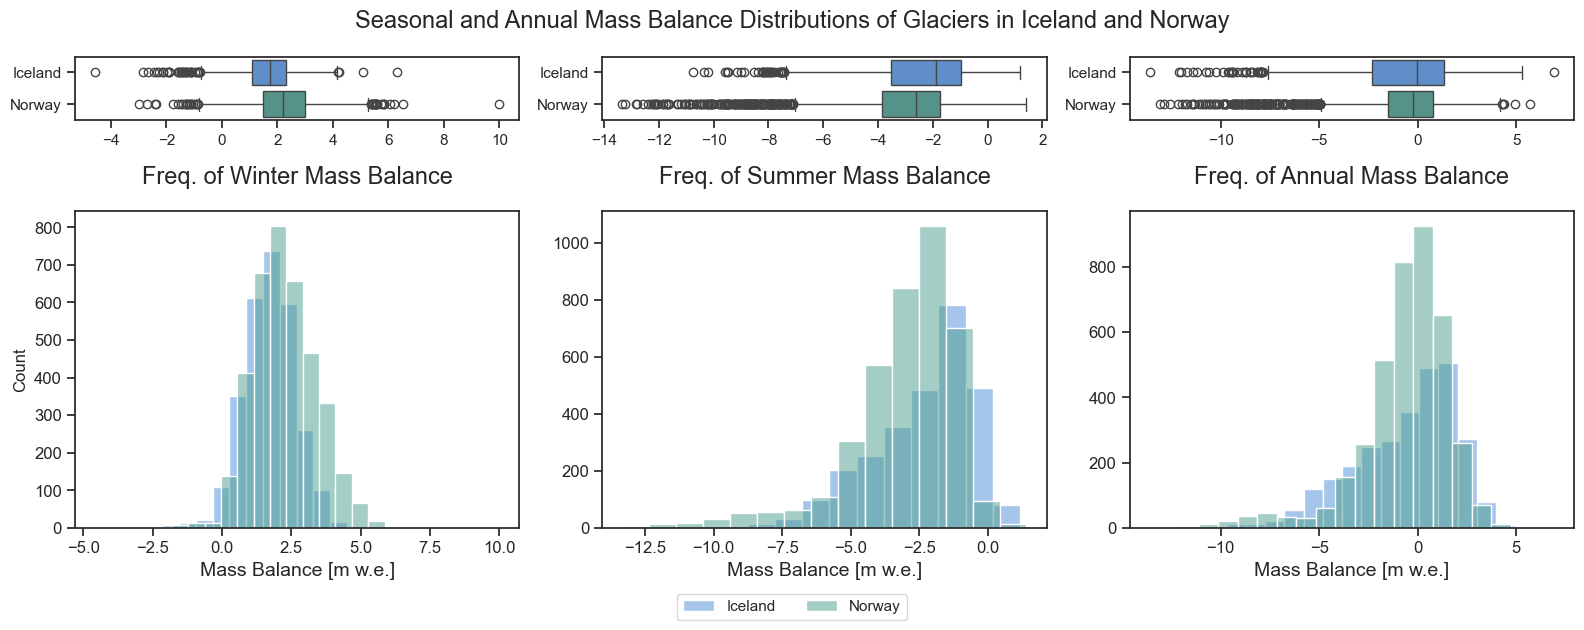

In [42]:
cols_mass_balance = ['bw_stratigraphic', 'bs_stratigraphic', 'ba_stratigraphic']
labels_mass_balance = ['Mass Balance [m w.e.]'] * 3
titles_mass_balance = ['Freq. of Winter Mass Balance', 'Freq. of Summer Mass Balance', 'Freq. of Annual Mass Balance']
fig_title_mass_balance = 'Seasonal and Annual Mass Balance Distributions of Glaciers in Iceland and Norway'
binwidths_mass_balance = [.6, 1, 1]

plot_dual_histograms(cols_mass_balance, titles_mass_balance, labels_mass_balance, binwidths_mass_balance, fig_title_mass_balance)

### Create a Time Series for All Stake Data in Iceland

In [43]:
# Load the climate data and get the mean t2m (temp. 2m above ground level), and average it per year and per area (longitude and latittude)
with xr.open_dataset(file_dir + 'climate/ERA5_monthly_averaged_climate_data.nc') as ds_climate:
    ds = ds_climate.t2m.resample(time="1y").mean(dim=["time", "latitude", "longitude"])
    ds = ds.reduce(np.nansum, 'expver') 
    temps = ds.values - 273.15  # Convert to Celsius directly
    temps = temps[:-1]  # Remove the last element
    
df_iceland_amb = df_iceland[['yr', 'stake', 'ba_stratigraphic']]

# Calculate the mean and standard deviation of the annual mass balance for all stake data in Iceland
mean_ba_per_year = df_iceland_amb.groupby('yr')['ba_stratigraphic'].mean()
std_ba_per_year = df_iceland_amb.groupby('yr')['ba_stratigraphic'].std()

In [44]:
def consecutive_nan(vals):
    # Calculate the difference between consecutive years
    year_diff = np.diff(vals)

    # Check if there are any consecutive NaN values or if the difference between consecutive years is greater than 10 or less than 0
    result = np.any((np.isnan(year_diff)) | (year_diff >= 10) | (year_diff < 0))
    
    return result

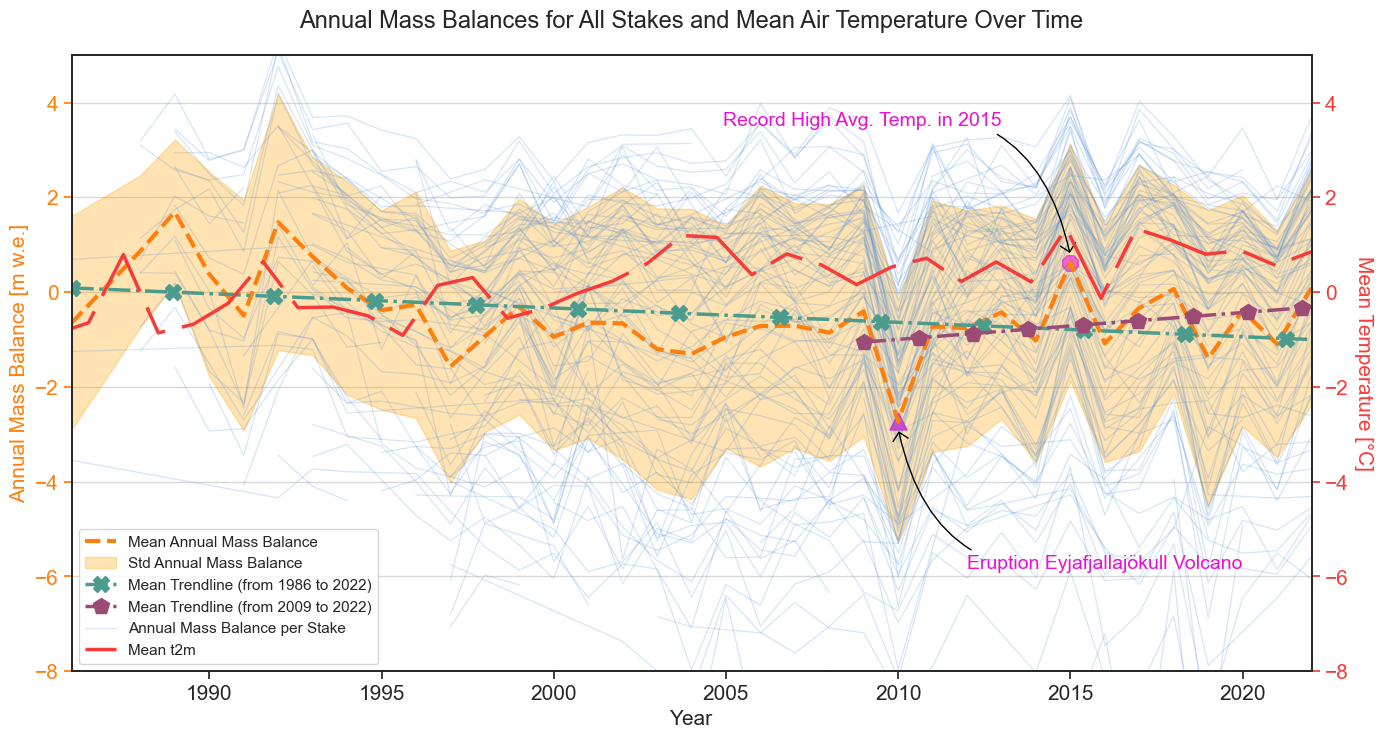

In [45]:
# Set up the main figure and axis
fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()  # Create a secondary y-axis

# access legend objects automatically created from data
handles, labels = plt.gca().get_legend_handles_labels()

# Plot individual stake data
for stake_name, group_data in df_iceland_amb.groupby('stake'):
    if consecutive_nan(group_data.yr.values) or len(group_data.yr.values) <= 10:
        continue
    else: 
        ax.plot(group_data['yr'], group_data['ba_stratigraphic'], alpha=0.225, color='#4e8cd9', linewidth=0.9)

# Plot mean annual mass balance with standard deviation shading
mean_amb = ax.plot(mean_ba_per_year, linestyle='--', color='#ff7f0e', label='Mean Annual Mass Balance', linewidth=3)
std_amb = ax.fill_between(mean_ba_per_year.index, 
                           mean_ba_per_year - std_ba_per_year, 
                           mean_ba_per_year + std_ba_per_year, 
                           color='orange', alpha=0.3, label='Std Annual Mass Balance')

# Highlight significant events with scatter plots
ax.scatter(x=2010, y=mean_ba_per_year[2010], color='#eb10d1', s=150, marker='^', alpha=0.8) 
ax.scatter(x=2015, y=mean_ba_per_year[2015], color='#eb10d1', s=150, marker='8', alpha=0.6) 

# Get min and max year from ds dataset
min_year_ds = pd.Timestamp(ds.time.min().values).year
max_year_ds = pd.Timestamp(ds.time.max().values).year

# Plot temperature data on secondary y-axis
ax2.plot(np.linspace(min_year_ds, max_year_ds, len(temps)), temps, dashes=[25, 5, 10, 5], color='#f73b3b', linewidth=2.5, label='Mean t2m')

# Plot overall trendline
overall_trend = np.polyfit(mean_ba_per_year.index, mean_ba_per_year.values, 1)
overall_fit = np.poly1d(overall_trend)
x_fit_overall = np.linspace(mean_ba_per_year.index.min(), mean_ba_per_year.index.max())
ax.plot(x_fit_overall, overall_fit(x_fit_overall), linestyle='-.', marker='X', markevery=4, markersize=12, linewidth=2.5, 
        color='#4b9c8d', label=f'Mean Trendline (from {mean_ba_per_year.index.min()} to {mean_ba_per_year.index.max()})')

# Plot recent trendline
max_year = np.max(mean_ba_per_year.index)
recent_trend = np.polyfit(mean_ba_per_year.loc[2009:max_year].index, mean_ba_per_year.loc[2009:max_year].values, 1)
recent_fit = np.poly1d(recent_trend)
x_fit_recent = np.linspace(2009, max_year)
ax.plot(x_fit_recent, recent_fit(x_fit_recent), linestyle='-.', marker='p', markevery=6, markersize=12, linewidth=2.5, 
        color='#9c4b75', label=f'Mean Trendline (from 2009 to {max_year})')

# Combine legends from both axes
ax.plot(np.NaN, np.NaN, '-',  alpha=0.225, color='#4e8cd9', linewidth=0.9, label='Annual Mass Balance per Stake')
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles=handles1 + handles2, labels=labels1 + labels2, loc='lower left')

# Set titles and labels
plt.title('Annual Mass Balances for All Stakes and Mean Air Temperature Over Time', fontsize=17)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Annual Mass Balance [m w.e.]', fontsize=15)
ax2.set_ylabel('Mean Temperature [°C]', fontsize=15, rotation=-90, labelpad=17.5)

# Adjust tick parameters
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15, colors='#ff7f0e')
ax2.yaxis.set_tick_params(labelsize=15, colors='#f73b3b')

# Add grid, set limits, and layout adjustments
ax.set_xlim(left=np.min(mean_ba_per_year.index), right=np.max(mean_ba_per_year.index))
ax.set_ylim(bottom=-8, top=5)
ax2.set_ylim(bottom=-8, top=5)
ax.yaxis.grid(color='gray', linestyle='-', alpha=0.3)

# Color adjustments
ax.yaxis.label.set_color('#ff7f0e')     
ax2.yaxis.label.set_color('#f73b3b')    

# Annotations
ax.annotate("Eruption Eyjafjallajökull Volcano",
            xy=(2010, mean_ba_per_year[2010]-0.15), xycoords='data',
            xytext=(2012, mean_ba_per_year[2010]-3), textcoords='data', size=14, va="center", ha="left",
            arrowprops=dict(arrowstyle="->, head_width=0.4", connectionstyle="arc3,rad=-.5", color='black'), color='#eb10d1')
ax.annotate("Record High Avg. Temp. in 2015",
            xy=(2015, mean_ba_per_year[2015]+0.15), xycoords='data',
            xytext=(2013, mean_ba_per_year[2015]+3), textcoords='data', size=14, va="center", ha="right",
            arrowprops=dict(arrowstyle="->, head_width=0.4", connectionstyle="arc3,rad=-.5", color='black'), color='#eb10d1')

# Save and display the plot
if 'PLOTTING' in globals() and PLOTTING:
    plt.savefig(file_dir + f'plots/timeseries.svg', dpi=600, format='svg', bbox_inches='tight')
plt.show()
plt.close(fig)

### Create a Hypsometry Plot for the Glaciers in Iceland

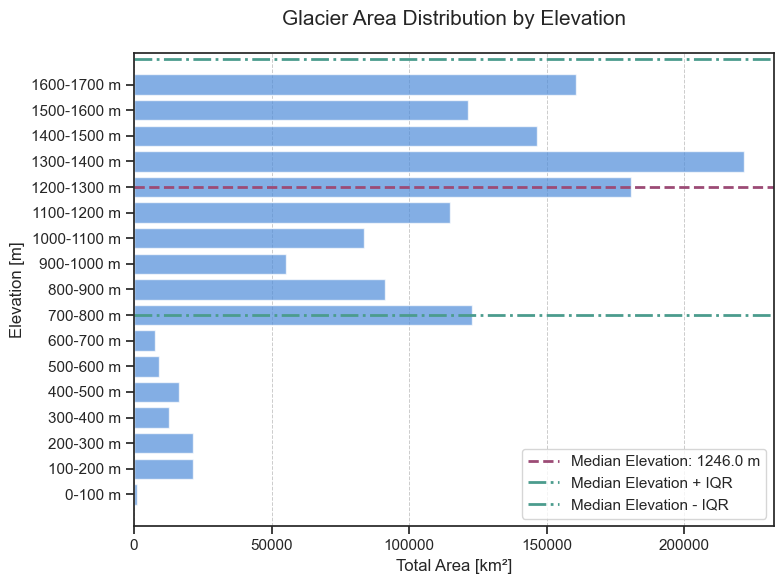

In [46]:
# Read data
areas_rgiids = pd.read_csv(file_dir + 'files/areas_rgiids.csv')
joined_dfs = pd.merge(df_iceland, areas_rgiids, on='RGIId')

# Define elevation bins
elevation_bins = np.arange(0, 1800, 100)

# Aggregate area data by elevation bins
joined_dfs['elevation_bin'] = pd.cut(joined_dfs['elevation'], bins=elevation_bins, right=False)
area_distribution = joined_dfs.groupby('elevation_bin')['area'].sum()

# Calculate median and IQR
median_elevation = np.median(joined_dfs['elevation'])
lower_quartile = np.percentile(joined_dfs['elevation'], 25)
upper_quartile = np.percentile(joined_dfs['elevation'], 75)
iqr = upper_quartile - lower_quartile

# Plotting
plt.figure(figsize=(8, 6))
plt.barh(area_distribution.index.astype(str), area_distribution.values, color='#4e8cd9', alpha=0.7)
plt.xlabel('Total Area [km²]', fontsize=12)
plt.ylabel('Elevation [m]', fontsize=12)
plt.title('Glacier Area Distribution by Elevation', fontsize=15)
plt.yticks(ticks=np.arange(len(area_distribution)), labels=[f'{int(bin.left)}-{int(bin.right)} m' for bin in area_distribution.index])
plt.axhline(y=median_elevation // 100, linestyle='--', color='#9c4b75', label=f'Median Elevation: {median_elevation} m', linewidth=2)
plt.axhline(y=(median_elevation + iqr) // 100, linestyle='-.', color='#4b9c8d', label=f'Median Elevation + IQR', linewidth=2)
plt.axhline(y=(median_elevation - iqr) // 100, linestyle='-.', color='#4b9c8d', label=f'Median Elevation - IQR', linewidth=2)
plt.legend()

# Adjusting layout and grid
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', linewidth=0.7)
plt.gca().yaxis.grid(False)
if 'PLOTTING' in globals() and PLOTTING:
    plt.savefig(file_dir + f'plots/hypsometry.svg', dpi=600, format='svg', bbox_inches='tight')
plt.show()